# Programming Lab 1 - Data Science

***
##### CS 434 - Dating Mining and Machine Learning
##### Oregon State University-Cascades
***

# Instructions

## Section Code
* Complete the four sections below. They roughly correspond to Activities 1-4, respectively.

* Add all your `import` packages only within the top `Load packages` block.

* Break large chucks of code into consecutive smaller code blocks.

* For each task, provide your code. And finish each task with a tangible output/result, either `display`/`print` or a graph.

* Comment your work: either within the code or as text blocks above.



## Section Report
* For each section, complete the mini-report. Answer the question with **complete sentences**, graphs, tables, and/or code blocks with `print`.

* Replace the *Lorem ipsum* text with your answers (but leave the *Student Response* header).  

* Answer each Report question individually each in separate (1+) text/code block(s).

* You can intersperse text and code blocks, as you like/need. 


* *Take pride in visual appeal of your answers.* Format your responses nicely. Review the markup tutorial in `Lecture 00-Getting Started`.

* If you use subsection headers, makes sure to use #### or smaller to stay within the `Student Response` section. 

***
# Load packages 
***

Add the packages you need here (not below!)

In [0]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
import urllib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.base import clone
from itertools import combinations
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import KBinsDiscretizer
ssl._create_default_https_context = ssl._create_unverified_context

***
# Dataset
***

In [0]:
dat_url = 'https://www.kdnuggets.com/data_mining_course/data/genes-leukemia.csv'
dat_description = 'https://www.kdnuggets.com/data_mining_course/data/genes-leukemia-description.txt'

Print out the provided description of the dataset.

In [0]:
# commented out to save space
# run this
data = urllib.request.urlopen(dat_description) 
# for line in data: 
#     print(line.decode("utf-8").replace('\n',''))

***
# Task 1: Data Exploration
***

### 1.1 Load and display data

In [0]:
df = pd.read_csv(dat_url)
df

,SNUM,CLASS,BM_PB,TB_if_ALL,FAB_if_AML,Year,Gender,pct_Blasts,Treatment_Response,PS,Source,D49950,D63880,J03473,J05243,L13278,L47738,M21551_rna1,M55150,M62762,M81933,M91432,S50223,U12471_cds1,U32944,U35451,U50136_rna1,U53468,U72342,U82759,X15949,X52142,X56411_rna1,X63469,X74262,X76061,X76648,X95735,Y08612,Y12670,D38073,AF012024_s,D26156_s,M84371_rna1_s,M31211_s,U09087_s,U26266_s,L49229_f,M31523,M28170,U29175
0,s1,ALL,BM,B-cell,?,1996,M,?,?,1.00,DFCI,75,556,2018,610,193,571,178,654,835,20,767,268,160,3349,408,1124,141,978,393,277,107,178,460,1372,210,1361,298,517,600,994,257,1595,2911,601,358,289,337,1320,397,1582
1,s2,ALL,BM,T-cell,?,?,M,?,?,0.41,DFCI,129,476,650,927,31,2893,336,1283,3072,20,814,346,134,1002,633,1062,84,324,118,104,20,183,151,1184,216,237,307,351,337,539,46,822,575,435,82,288,131,898,20,624
2,s3,ALL,BM,T-cell,?,?,M,?,?,0.87,DFCI,44,498,573,1697,198,2723,345,1286,609,124,1547,804,167,2089,912,1398,98,855,667,91,20,166,230,2221,250,1240,309,214,574,1441,139,1452,905,547,263,447,529,597,183,753
3,s4,ALL,BM,B-cell,?,?,?,?,?,0.91,DFCI,218,1211,2291,425,91,731,374,915,935,167,831,452,104,1625,304,942,20,369,410,403,190,131,314,1051,139,992,693,432,716,680,168,654,2038,472,218,424,422,1644,363,743
4,s5,ALL,BM,B-cell,?,?,?,?,?,0.89,DFCI,110,820,2796,529,194,649,321,732,1665,114,1423,476,145,3502,398,928,238,653,119,416,361,141,632,1370,270,1233,713,596,524,950,94,1011,1871,661,186,364,354,1322,251,626
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,s68,ALL,PB,B-cell,?,1998,M,?,?,0.80,DFCI,145,734,3090,1226,179,1235,140,859,1618,20,1385,439,216,3869,523,1049,335,1083,386,469,352,107,400,1700,312,1690,1931,517,648,688,202,1131,643,580,255,755,443,3923,67,1088
68,s69,ALL,PB,B-cell,?,1998,M,?,?,0.85,DFCI,84,545,2412,765,91,1284,351,623,1760,182,1012,607,120,1569,146,1496,271,659,349,379,161,152,599,808,457,1211,395,596,391,706,227,1187,2362,573,208,476,258,1794,155,1187
69,s70,ALL,PB,B-cell,?,1998,F,?,?,0.73,DFCI,20,440,1146,344,117,853,30,360,1025,301,334,106,185,1072,252,682,27,85,51,75,86,69,213,490,37,533,43,349,86,519,77,693,1955,348,43,100,89,1277,266,1002
70,s71,ALL,PB,B-cell,?,1998,?,?,?,0.30,DFCI,105,113,704,1164,25,1213,263,310,1494,170,146,20,134,227,239,931,78,168,20,75,31,232,232,149,396,471,509,353,396,144,81,1313,1399,218,110,388,81,828,142,1504


### 1.2 Identify which features have missing data

In [0]:
df.where(df != '?').isnull().sum()
df

/usr/local/lib/python3.6/dist-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


,SNUM,CLASS,BM_PB,TB_if_ALL,FAB_if_AML,Year,Gender,pct_Blasts,Treatment_Response,PS,Source,D49950,D63880,J03473,J05243,L13278,L47738,M21551_rna1,M55150,M62762,M81933,M91432,S50223,U12471_cds1,U32944,U35451,U50136_rna1,U53468,U72342,U82759,X15949,X52142,X56411_rna1,X63469,X74262,X76061,X76648,X95735,Y08612,Y12670,D38073,AF012024_s,D26156_s,M84371_rna1_s,M31211_s,U09087_s,U26266_s,L49229_f,M31523,M28170,U29175
0,s1,ALL,BM,B-cell,?,1996,M,?,?,1.00,DFCI,75,556,2018,610,193,571,178,654,835,20,767,268,160,3349,408,1124,141,978,393,277,107,178,460,1372,210,1361,298,517,600,994,257,1595,2911,601,358,289,337,1320,397,1582
1,s2,ALL,BM,T-cell,?,?,M,?,?,0.41,DFCI,129,476,650,927,31,2893,336,1283,3072,20,814,346,134,1002,633,1062,84,324,118,104,20,183,151,1184,216,237,307,351,337,539,46,822,575,435,82,288,131,898,20,624
2,s3,ALL,BM,T-cell,?,?,M,?,?,0.87,DFCI,44,498,573,1697,198,2723,345,1286,609,124,1547,804,167,2089,912,1398,98,855,667,91,20,166,230,2221,250,1240,309,214,574,1441,139,1452,905,547,263,447,529,597,183,753
3,s4,ALL,BM,B-cell,?,?,?,?,?,0.91,DFCI,218,1211,2291,425,91,731,374,915,935,167,831,452,104,1625,304,942,20,369,410,403,190,131,314,1051,139,992,693,432,716,680,168,654,2038,472,218,424,422,1644,363,743
4,s5,ALL,BM,B-cell,?,?,?,?,?,0.89,DFCI,110,820,2796,529,194,649,321,732,1665,114,1423,476,145,3502,398,928,238,653,119,416,361,141,632,1370,270,1233,713,596,524,950,94,1011,1871,661,186,364,354,1322,251,626
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,s68,ALL,PB,B-cell,?,1998,M,?,?,0.80,DFCI,145,734,3090,1226,179,1235,140,859,1618,20,1385,439,216,3869,523,1049,335,1083,386,469,352,107,400,1700,312,1690,1931,517,648,688,202,1131,643,580,255,755,443,3923,67,1088
68,s69,ALL,PB,B-cell,?,1998,M,?,?,0.85,DFCI,84,545,2412,765,91,1284,351,623,1760,182,1012,607,120,1569,146,1496,271,659,349,379,161,152,599,808,457,1211,395,596,391,706,227,1187,2362,573,208,476,258,1794,155,1187
69,s70,ALL,PB,B-cell,?,1998,F,?,?,0.73,DFCI,20,440,1146,344,117,853,30,360,1025,301,334,106,185,1072,252,682,27,85,51,75,86,69,213,490,37,533,43,349,86,519,77,693,1955,348,43,100,89,1277,266,1002
70,s71,ALL,PB,B-cell,?,1998,?,?,?,0.30,DFCI,105,113,704,1164,25,1213,263,310,1494,170,146,20,134,227,239,931,78,168,20,75,31,232,232,149,396,471,509,353,396,144,81,1313,1399,218,110,388,81,828,142,1504


### 1.3 Convert all missing values to `NaN`

In [0]:
df = df.where(df != '?')
df

/usr/local/lib/python3.6/dist-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


,SNUM,CLASS,BM_PB,TB_if_ALL,FAB_if_AML,Year,Gender,pct_Blasts,Treatment_Response,PS,Source,D49950,D63880,J03473,J05243,L13278,L47738,M21551_rna1,M55150,M62762,M81933,M91432,S50223,U12471_cds1,U32944,U35451,U50136_rna1,U53468,U72342,U82759,X15949,X52142,X56411_rna1,X63469,X74262,X76061,X76648,X95735,Y08612,Y12670,D38073,AF012024_s,D26156_s,M84371_rna1_s,M31211_s,U09087_s,U26266_s,L49229_f,M31523,M28170,U29175
0,s1,ALL,BM,B-cell,NaN,1996,M,NaN,NaN,1.00,DFCI,75,556,2018,610,193,571,178,654,835,20,767,268,160,3349,408,1124,141,978,393,277,107,178,460,1372,210,1361,298,517,600,994,257,1595,2911,601,358,289,337,1320,397,1582
1,s2,ALL,BM,T-cell,NaN,NaN,M,NaN,NaN,0.41,DFCI,129,476,650,927,31,2893,336,1283,3072,20,814,346,134,1002,633,1062,84,324,118,104,20,183,151,1184,216,237,307,351,337,539,46,822,575,435,82,288,131,898,20,624
2,s3,ALL,BM,T-cell,NaN,NaN,M,NaN,NaN,0.87,DFCI,44,498,573,1697,198,2723,345,1286,609,124,1547,804,167,2089,912,1398,98,855,667,91,20,166,230,2221,250,1240,309,214,574,1441,139,1452,905,547,263,447,529,597,183,753
3,s4,ALL,BM,B-cell,NaN,NaN,NaN,NaN,NaN,0.91,DFCI,218,1211,2291,425,91,731,374,915,935,167,831,452,104,1625,304,942,20,369,410,403,190,131,314,1051,139,992,693,432,716,680,168,654,2038,472,218,424,422,1644,363,743
4,s5,ALL,BM,B-cell,NaN,NaN,NaN,NaN,NaN,0.89,DFCI,110,820,2796,529,194,649,321,732,1665,114,1423,476,145,3502,398,928,238,653,119,416,361,141,632,1370,270,1233,713,596,524,950,94,1011,1871,661,186,364,354,1322,251,626
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,s68,ALL,PB,B-cell,NaN,1998,M,NaN,NaN,0.80,DFCI,145,734,3090,1226,179,1235,140,859,1618,20,1385,439,216,3869,523,1049,335,1083,386,469,352,107,400,1700,312,1690,1931,517,648,688,202,1131,643,580,255,755,443,3923,67,1088
68,s69,ALL,PB,B-cell,NaN,1998,M,NaN,NaN,0.85,DFCI,84,545,2412,765,91,1284,351,623,1760,182,1012,607,120,1569,146,1496,271,659,349,379,161,152,599,808,457,1211,395,596,391,706,227,1187,2362,573,208,476,258,1794,155,1187
69,s70,ALL,PB,B-cell,NaN,1998,F,NaN,NaN,0.73,DFCI,20,440,1146,344,117,853,30,360,1025,301,334,106,185,1072,252,682,27,85,51,75,86,69,213,490,37,533,43,349,86,519,77,693,1955,348,43,100,89,1277,266,1002
70,s71,ALL,PB,B-cell,NaN,1998,NaN,NaN,NaN,0.30,DFCI,105,113,704,1164,25,1213,263,310,1494,170,146,20,134,227,239,931,78,168,20,75,31,232,232,149,396,471,509,353,396,144,81,1313,1399,218,110,388,81,828,142,1504


### 1.4 Drop unique columns

Drop any columns that are not features.  That is to say it was a unique value for each example (and thus conveys no information). 

In [0]:
df = df.drop('SNUM', axis=1)
df.dtypes.value_counts()

int64      40
object      9
float64     1
dtype: int64

***
## <img src="https://img.icons8.com/color/32/000000/new-document.png"/> Section 1 - Report

Answer the following questions below:
1. How many records are there?
1. How many features are there?
1. How many features are continuous?
1. How many features are nominal (exclude class label)?
1. How many `NaN` values are there?
1. Which columns did you drop in Task `1.4`?

### <img src="https://img.icons8.com/color/32/000000/speech-bubble-with-dots.png"/> **Student Response**


**How many records are there?**.   
72

**How many features are there?**.   
50

**How many features are continuous?**.   
41

**How many features are nominal (exclude class label)**
8

**How many NaN values are there?**.   
259

**Which columns did you drop in Task `1.4`?**.   
SNUM

***
# Task 2 - Data Cleaning
***

### 2.1 Fix the feature `Gender`

Map the unknowns to a string label `U` to add to the existing values `{M, F}`

In [0]:
df['Gender'].fillna('U', inplace=True)
df

,CLASS,BM_PB,TB_if_ALL,FAB_if_AML,Year,Gender,pct_Blasts,Treatment_Response,PS,Source,D49950,D63880,J03473,J05243,L13278,L47738,M21551_rna1,M55150,M62762,M81933,M91432,S50223,U12471_cds1,U32944,U35451,U50136_rna1,U53468,U72342,U82759,X15949,X52142,X56411_rna1,X63469,X74262,X76061,X76648,X95735,Y08612,Y12670,D38073,AF012024_s,D26156_s,M84371_rna1_s,M31211_s,U09087_s,U26266_s,L49229_f,M31523,M28170,U29175
0,ALL,BM,B-cell,NaN,1996,M,NaN,NaN,1.00,DFCI,75,556,2018,610,193,571,178,654,835,20,767,268,160,3349,408,1124,141,978,393,277,107,178,460,1372,210,1361,298,517,600,994,257,1595,2911,601,358,289,337,1320,397,1582
1,ALL,BM,T-cell,NaN,NaN,M,NaN,NaN,0.41,DFCI,129,476,650,927,31,2893,336,1283,3072,20,814,346,134,1002,633,1062,84,324,118,104,20,183,151,1184,216,237,307,351,337,539,46,822,575,435,82,288,131,898,20,624
2,ALL,BM,T-cell,NaN,NaN,M,NaN,NaN,0.87,DFCI,44,498,573,1697,198,2723,345,1286,609,124,1547,804,167,2089,912,1398,98,855,667,91,20,166,230,2221,250,1240,309,214,574,1441,139,1452,905,547,263,447,529,597,183,753
3,ALL,BM,B-cell,NaN,NaN,U,NaN,NaN,0.91,DFCI,218,1211,2291,425,91,731,374,915,935,167,831,452,104,1625,304,942,20,369,410,403,190,131,314,1051,139,992,693,432,716,680,168,654,2038,472,218,424,422,1644,363,743
4,ALL,BM,B-cell,NaN,NaN,U,NaN,NaN,0.89,DFCI,110,820,2796,529,194,649,321,732,1665,114,1423,476,145,3502,398,928,238,653,119,416,361,141,632,1370,270,1233,713,596,524,950,94,1011,1871,661,186,364,354,1322,251,626
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,ALL,PB,B-cell,NaN,1998,M,NaN,NaN,0.80,DFCI,145,734,3090,1226,179,1235,140,859,1618,20,1385,439,216,3869,523,1049,335,1083,386,469,352,107,400,1700,312,1690,1931,517,648,688,202,1131,643,580,255,755,443,3923,67,1088
68,ALL,PB,B-cell,NaN,1998,M,NaN,NaN,0.85,DFCI,84,545,2412,765,91,1284,351,623,1760,182,1012,607,120,1569,146,1496,271,659,349,379,161,152,599,808,457,1211,395,596,391,706,227,1187,2362,573,208,476,258,1794,155,1187
69,ALL,PB,B-cell,NaN,1998,F,NaN,NaN,0.73,DFCI,20,440,1146,344,117,853,30,360,1025,301,334,106,185,1072,252,682,27,85,51,75,86,69,213,490,37,533,43,349,86,519,77,693,1955,348,43,100,89,1277,266,1002
70,ALL,PB,B-cell,NaN,1998,U,NaN,NaN,0.30,DFCI,105,113,704,1164,25,1213,263,310,1494,170,146,20,134,227,239,931,78,168,20,75,31,232,232,149,396,471,509,353,396,144,81,1313,1399,218,110,388,81,828,142,1504


### 2.2 Merge the features `TB_if_ALL` and `FAB_if_AML`




These represent two types of tests. `TB_if_ALL` has values `{'T-cell', 'B-cell'}`. Whereas `FAB_if_AML` has values such as `M1`, `M2`, etc. 

Let's combine them into once column `TB_FAB` that has the values of `{'T-cell', 'B-cell', 'M'}`.

> Note we set any value `M1`, `M2`, `M3` to be just `M`.

Once you have combined the columns `TB_if_ALL` and `FAB_if_AML` into `TB_FAB` successfully, you can drop the original columns `TB_if_ALL` and `FAB_if_AML` (and keep the combined column).

In [0]:
df['FAB_if_AML'] = df['FAB_if_AML'].astype(str).map(lambda x: x.rstrip('123456789'))
df['TB_FAB'] = df['TB_if_ALL'].combine_first(df['FAB_if_AML'])
# df['FAB_if_AML'].value_counts()
# df['TB_if_ALL'].value_counts()
# df['TB_FAB'].value_counts()
df = df.drop(['TB_if_ALL', 'FAB_if_AML'], axis=1)
df

,CLASS,BM_PB,Year,Gender,pct_Blasts,Treatment_Response,PS,Source,D49950,D63880,J03473,J05243,L13278,L47738,M21551_rna1,M55150,M62762,M81933,M91432,S50223,U12471_cds1,U32944,U35451,U50136_rna1,U53468,U72342,U82759,X15949,X52142,X56411_rna1,X63469,X74262,X76061,X76648,X95735,Y08612,Y12670,D38073,AF012024_s,D26156_s,M84371_rna1_s,M31211_s,U09087_s,U26266_s,L49229_f,M31523,M28170,U29175,TB_FAB
0,ALL,BM,1996,M,NaN,NaN,1.00,DFCI,75,556,2018,610,193,571,178,654,835,20,767,268,160,3349,408,1124,141,978,393,277,107,178,460,1372,210,1361,298,517,600,994,257,1595,2911,601,358,289,337,1320,397,1582,B-cell
1,ALL,BM,NaN,M,NaN,NaN,0.41,DFCI,129,476,650,927,31,2893,336,1283,3072,20,814,346,134,1002,633,1062,84,324,118,104,20,183,151,1184,216,237,307,351,337,539,46,822,575,435,82,288,131,898,20,624,T-cell
2,ALL,BM,NaN,M,NaN,NaN,0.87,DFCI,44,498,573,1697,198,2723,345,1286,609,124,1547,804,167,2089,912,1398,98,855,667,91,20,166,230,2221,250,1240,309,214,574,1441,139,1452,905,547,263,447,529,597,183,753,T-cell
3,ALL,BM,NaN,U,NaN,NaN,0.91,DFCI,218,1211,2291,425,91,731,374,915,935,167,831,452,104,1625,304,942,20,369,410,403,190,131,314,1051,139,992,693,432,716,680,168,654,2038,472,218,424,422,1644,363,743,B-cell
4,ALL,BM,NaN,U,NaN,NaN,0.89,DFCI,110,820,2796,529,194,649,321,732,1665,114,1423,476,145,3502,398,928,238,653,119,416,361,141,632,1370,270,1233,713,596,524,950,94,1011,1871,661,186,364,354,1322,251,626,B-cell
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,ALL,PB,1998,M,NaN,NaN,0.80,DFCI,145,734,3090,1226,179,1235,140,859,1618,20,1385,439,216,3869,523,1049,335,1083,386,469,352,107,400,1700,312,1690,1931,517,648,688,202,1131,643,580,255,755,443,3923,67,1088,B-cell
68,ALL,PB,1998,M,NaN,NaN,0.85,DFCI,84,545,2412,765,91,1284,351,623,1760,182,1012,607,120,1569,146,1496,271,659,349,379,161,152,599,808,457,1211,395,596,391,706,227,1187,2362,573,208,476,258,1794,155,1187,B-cell
69,ALL,PB,1998,F,NaN,NaN,0.73,DFCI,20,440,1146,344,117,853,30,360,1025,301,334,106,185,1072,252,682,27,85,51,75,86,69,213,490,37,533,43,349,86,519,77,693,1955,348,43,100,89,1277,266,1002,B-cell
70,ALL,PB,1998,U,NaN,NaN,0.30,DFCI,105,113,704,1164,25,1213,263,310,1494,170,146,20,134,227,239,931,78,168,20,75,31,232,232,149,396,471,509,353,396,144,81,1313,1399,218,110,388,81,828,142,1504,B-cell


### 2.3 Drop certain rows depending on `TB_FAB`

For any record still missing from the merged `TB_FAB` feature, drop that entire row.

In [0]:
df = df.dropna(subset=['TB_FAB'])
df = df[df['TB_FAB'] != 'nan']
df

,CLASS,BM_PB,Year,Gender,pct_Blasts,Treatment_Response,PS,Source,D49950,D63880,J03473,J05243,L13278,L47738,M21551_rna1,M55150,M62762,M81933,M91432,S50223,U12471_cds1,U32944,U35451,U50136_rna1,U53468,U72342,U82759,X15949,X52142,X56411_rna1,X63469,X74262,X76061,X76648,X95735,Y08612,Y12670,D38073,AF012024_s,D26156_s,M84371_rna1_s,M31211_s,U09087_s,U26266_s,L49229_f,M31523,M28170,U29175,TB_FAB
0,ALL,BM,1996,M,NaN,NaN,1.00,DFCI,75,556,2018,610,193,571,178,654,835,20,767,268,160,3349,408,1124,141,978,393,277,107,178,460,1372,210,1361,298,517,600,994,257,1595,2911,601,358,289,337,1320,397,1582,B-cell
1,ALL,BM,NaN,M,NaN,NaN,0.41,DFCI,129,476,650,927,31,2893,336,1283,3072,20,814,346,134,1002,633,1062,84,324,118,104,20,183,151,1184,216,237,307,351,337,539,46,822,575,435,82,288,131,898,20,624,T-cell
2,ALL,BM,NaN,M,NaN,NaN,0.87,DFCI,44,498,573,1697,198,2723,345,1286,609,124,1547,804,167,2089,912,1398,98,855,667,91,20,166,230,2221,250,1240,309,214,574,1441,139,1452,905,547,263,447,529,597,183,753,T-cell
3,ALL,BM,NaN,U,NaN,NaN,0.91,DFCI,218,1211,2291,425,91,731,374,915,935,167,831,452,104,1625,304,942,20,369,410,403,190,131,314,1051,139,992,693,432,716,680,168,654,2038,472,218,424,422,1644,363,743,B-cell
4,ALL,BM,NaN,U,NaN,NaN,0.89,DFCI,110,820,2796,529,194,649,321,732,1665,114,1423,476,145,3502,398,928,238,653,119,416,361,141,632,1370,270,1233,713,596,524,950,94,1011,1871,661,186,364,354,1322,251,626,B-cell
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,ALL,PB,1998,M,NaN,NaN,0.80,DFCI,145,734,3090,1226,179,1235,140,859,1618,20,1385,439,216,3869,523,1049,335,1083,386,469,352,107,400,1700,312,1690,1931,517,648,688,202,1131,643,580,255,755,443,3923,67,1088,B-cell
68,ALL,PB,1998,M,NaN,NaN,0.85,DFCI,84,545,2412,765,91,1284,351,623,1760,182,1012,607,120,1569,146,1496,271,659,349,379,161,152,599,808,457,1211,395,596,391,706,227,1187,2362,573,208,476,258,1794,155,1187,B-cell
69,ALL,PB,1998,F,NaN,NaN,0.73,DFCI,20,440,1146,344,117,853,30,360,1025,301,334,106,185,1072,252,682,27,85,51,75,86,69,213,490,37,533,43,349,86,519,77,693,1955,348,43,100,89,1277,266,1002,B-cell
70,ALL,PB,1998,U,NaN,NaN,0.30,DFCI,105,113,704,1164,25,1213,263,310,1494,170,146,20,134,227,239,931,78,168,20,75,31,232,232,149,396,471,509,353,396,144,81,1313,1399,218,110,388,81,828,142,1504,B-cell


### 2.4 Drop or Impute?

For any each other column missing data, check to see what percent of records are missing values.

1. `if` the missing records are more than $1/3$ of all values, drop the column
2. `else` impute the mean value for the column


In [0]:
# I spend more time than I'd like to admit figuring this one out :(
# First I looked at how many columns contained NaNs (commented out)
# Then I dropped columns by locating labels where the sum of NaN's > 1/3 num rows
# Since all columns that contained Nan's were > 1/3 num rows, I didnt need to impute

# df.loc[:, df.isnull().any()].apply(lambda x: x.isnull().sum(), axis=0)
df = df.drop(df.columns[df.apply(lambda x: x.isnull().sum() > (len(x) * (1/3)))], axis=1)
df

,CLASS,BM_PB,Gender,PS,Source,D49950,D63880,J03473,J05243,L13278,L47738,M21551_rna1,M55150,M62762,M81933,M91432,S50223,U12471_cds1,U32944,U35451,U50136_rna1,U53468,U72342,U82759,X15949,X52142,X56411_rna1,X63469,X74262,X76061,X76648,X95735,Y08612,Y12670,D38073,AF012024_s,D26156_s,M84371_rna1_s,M31211_s,U09087_s,U26266_s,L49229_f,M31523,M28170,U29175,TB_FAB
0,ALL,BM,M,1.00,DFCI,75,556,2018,610,193,571,178,654,835,20,767,268,160,3349,408,1124,141,978,393,277,107,178,460,1372,210,1361,298,517,600,994,257,1595,2911,601,358,289,337,1320,397,1582,B-cell
1,ALL,BM,M,0.41,DFCI,129,476,650,927,31,2893,336,1283,3072,20,814,346,134,1002,633,1062,84,324,118,104,20,183,151,1184,216,237,307,351,337,539,46,822,575,435,82,288,131,898,20,624,T-cell
2,ALL,BM,M,0.87,DFCI,44,498,573,1697,198,2723,345,1286,609,124,1547,804,167,2089,912,1398,98,855,667,91,20,166,230,2221,250,1240,309,214,574,1441,139,1452,905,547,263,447,529,597,183,753,T-cell
3,ALL,BM,U,0.91,DFCI,218,1211,2291,425,91,731,374,915,935,167,831,452,104,1625,304,942,20,369,410,403,190,131,314,1051,139,992,693,432,716,680,168,654,2038,472,218,424,422,1644,363,743,B-cell
4,ALL,BM,U,0.89,DFCI,110,820,2796,529,194,649,321,732,1665,114,1423,476,145,3502,398,928,238,653,119,416,361,141,632,1370,270,1233,713,596,524,950,94,1011,1871,661,186,364,354,1322,251,626,B-cell
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,ALL,PB,M,0.80,DFCI,145,734,3090,1226,179,1235,140,859,1618,20,1385,439,216,3869,523,1049,335,1083,386,469,352,107,400,1700,312,1690,1931,517,648,688,202,1131,643,580,255,755,443,3923,67,1088,B-cell
68,ALL,PB,M,0.85,DFCI,84,545,2412,765,91,1284,351,623,1760,182,1012,607,120,1569,146,1496,271,659,349,379,161,152,599,808,457,1211,395,596,391,706,227,1187,2362,573,208,476,258,1794,155,1187,B-cell
69,ALL,PB,F,0.73,DFCI,20,440,1146,344,117,853,30,360,1025,301,334,106,185,1072,252,682,27,85,51,75,86,69,213,490,37,533,43,349,86,519,77,693,1955,348,43,100,89,1277,266,1002,B-cell
70,ALL,PB,U,0.30,DFCI,105,113,704,1164,25,1213,263,310,1494,170,146,20,134,227,239,931,78,168,20,75,31,232,232,149,396,471,509,353,396,144,81,1313,1399,218,110,388,81,828,142,1504,B-cell


### 2.5 Convert categorical data to ordinal values

In [0]:
# df = df.select_dtypes(include=['object']).copy()
ord_vals = {"BM_PB": {'BM': 0, 'PB': 1}, "Gender": {'F': 0, 'M': 1, 'U': 2}, "Source": {'CALGB': 0, 'DFCI': 1, 'St-Jude': 2}, "TB_FAB": {"B-cell": 0, "T-cell": 1, "M": 2}}
df = df.replace(ord_vals)
df

,CLASS,BM_PB,Gender,PS,Source,D49950,D63880,J03473,J05243,L13278,L47738,M21551_rna1,M55150,M62762,M81933,M91432,S50223,U12471_cds1,U32944,U35451,U50136_rna1,U53468,U72342,U82759,X15949,X52142,X56411_rna1,X63469,X74262,X76061,X76648,X95735,Y08612,Y12670,D38073,AF012024_s,D26156_s,M84371_rna1_s,M31211_s,U09087_s,U26266_s,L49229_f,M31523,M28170,U29175,TB_FAB
0,ALL,0,1,1.00,1,75,556,2018,610,193,571,178,654,835,20,767,268,160,3349,408,1124,141,978,393,277,107,178,460,1372,210,1361,298,517,600,994,257,1595,2911,601,358,289,337,1320,397,1582,0
1,ALL,0,1,0.41,1,129,476,650,927,31,2893,336,1283,3072,20,814,346,134,1002,633,1062,84,324,118,104,20,183,151,1184,216,237,307,351,337,539,46,822,575,435,82,288,131,898,20,624,1
2,ALL,0,1,0.87,1,44,498,573,1697,198,2723,345,1286,609,124,1547,804,167,2089,912,1398,98,855,667,91,20,166,230,2221,250,1240,309,214,574,1441,139,1452,905,547,263,447,529,597,183,753,1
3,ALL,0,2,0.91,1,218,1211,2291,425,91,731,374,915,935,167,831,452,104,1625,304,942,20,369,410,403,190,131,314,1051,139,992,693,432,716,680,168,654,2038,472,218,424,422,1644,363,743,0
4,ALL,0,2,0.89,1,110,820,2796,529,194,649,321,732,1665,114,1423,476,145,3502,398,928,238,653,119,416,361,141,632,1370,270,1233,713,596,524,950,94,1011,1871,661,186,364,354,1322,251,626,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,ALL,1,1,0.80,1,145,734,3090,1226,179,1235,140,859,1618,20,1385,439,216,3869,523,1049,335,1083,386,469,352,107,400,1700,312,1690,1931,517,648,688,202,1131,643,580,255,755,443,3923,67,1088,0
68,ALL,1,1,0.85,1,84,545,2412,765,91,1284,351,623,1760,182,1012,607,120,1569,146,1496,271,659,349,379,161,152,599,808,457,1211,395,596,391,706,227,1187,2362,573,208,476,258,1794,155,1187,0
69,ALL,1,0,0.73,1,20,440,1146,344,117,853,30,360,1025,301,334,106,185,1072,252,682,27,85,51,75,86,69,213,490,37,533,43,349,86,519,77,693,1955,348,43,100,89,1277,266,1002,0
70,ALL,1,2,0.30,1,105,113,704,1164,25,1213,263,310,1494,170,146,20,134,227,239,931,78,168,20,75,31,232,232,149,396,471,509,353,396,144,81,1313,1399,218,110,388,81,828,142,1504,0


***
## <img src="https://img.icons8.com/color/32/000000/new-document.png"/> Section 2 - Report

Answer the following questions below:
1. Provide the counts for `Gender` for each `{'M', 'F', 'U'}`.
1. Provide the counts for `TB_FAB` for each `{'T-cell', 'B-cell', 'M'}`.
1. Explain how you went about merging to produce `TB_FAB`.
1. How many rows did you drop that were missing a `TB_FAB` value?
1. Which columns did you drop?  Which did you impute?
1. Which columns did you convert from categorical to ordinal?

### <img src="https://img.icons8.com/color/32/000000/speech-bubble-with-dots.png"/> **Student Response**


In [0]:
df["Gender"].value_counts()

2    23
1    22
0    22
Name: Gender, dtype: int64

**Provide the counts for `Gender` for each `{'M', 'F', 'U'}`.**    
M: 22,    
F: 22,    
U: 23

In [0]:
df["TB_FAB"].value_counts()

0    38
2    20
1     9
Name: TB_FAB, dtype: int64

**Provide the counts for `TB_FAB` for each `{'T-cell', 'B-cell', 'M'}`.**     
B-cell: 38,    
T-cell: 9,    
M: 20

**Explain how you went about merging to produce TB_FAB.**.   
First I stripped any integer characters from the right end of the string and then merged 'FAB_if_AML' into 'TB_if_ALL'.

**How many rows did you drop that were missing a TB_FAB value?**    
5

**Which columns did you drop? Which did you impute?**    
dropped: pct_Blasts, Treatment_Response, and Year.   
imputed: n/a

**Which columns did you convert from categorical to ordinal?**    
"BM_PB", "Gender", "Source", "TB_FAB"

***
# Section 3 - Datasets
***

### 3.1 Encode the class label

In [0]:
class_mapping = {label: idx for idx, label in enumerate(np.unique(df['CLASS']))}
df['CLASS'] = df['CLASS'].map(class_mapping)
df

,CLASS,BM_PB,Gender,PS,Source,D49950,D63880,J03473,J05243,L13278,L47738,M21551_rna1,M55150,M62762,M81933,M91432,S50223,U12471_cds1,U32944,U35451,U50136_rna1,U53468,U72342,U82759,X15949,X52142,X56411_rna1,X63469,X74262,X76061,X76648,X95735,Y08612,Y12670,D38073,AF012024_s,D26156_s,M84371_rna1_s,M31211_s,U09087_s,U26266_s,L49229_f,M31523,M28170,U29175,TB_FAB
0,0,0,1,1.00,1,75,556,2018,610,193,571,178,654,835,20,767,268,160,3349,408,1124,141,978,393,277,107,178,460,1372,210,1361,298,517,600,994,257,1595,2911,601,358,289,337,1320,397,1582,0
1,0,0,1,0.41,1,129,476,650,927,31,2893,336,1283,3072,20,814,346,134,1002,633,1062,84,324,118,104,20,183,151,1184,216,237,307,351,337,539,46,822,575,435,82,288,131,898,20,624,1
2,0,0,1,0.87,1,44,498,573,1697,198,2723,345,1286,609,124,1547,804,167,2089,912,1398,98,855,667,91,20,166,230,2221,250,1240,309,214,574,1441,139,1452,905,547,263,447,529,597,183,753,1
3,0,0,2,0.91,1,218,1211,2291,425,91,731,374,915,935,167,831,452,104,1625,304,942,20,369,410,403,190,131,314,1051,139,992,693,432,716,680,168,654,2038,472,218,424,422,1644,363,743,0
4,0,0,2,0.89,1,110,820,2796,529,194,649,321,732,1665,114,1423,476,145,3502,398,928,238,653,119,416,361,141,632,1370,270,1233,713,596,524,950,94,1011,1871,661,186,364,354,1322,251,626,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,0,1,1,0.80,1,145,734,3090,1226,179,1235,140,859,1618,20,1385,439,216,3869,523,1049,335,1083,386,469,352,107,400,1700,312,1690,1931,517,648,688,202,1131,643,580,255,755,443,3923,67,1088,0
68,0,1,1,0.85,1,84,545,2412,765,91,1284,351,623,1760,182,1012,607,120,1569,146,1496,271,659,349,379,161,152,599,808,457,1211,395,596,391,706,227,1187,2362,573,208,476,258,1794,155,1187,0
69,0,1,0,0.73,1,20,440,1146,344,117,853,30,360,1025,301,334,106,185,1072,252,682,27,85,51,75,86,69,213,490,37,533,43,349,86,519,77,693,1955,348,43,100,89,1277,266,1002,0
70,0,1,2,0.30,1,105,113,704,1164,25,1213,263,310,1494,170,146,20,134,227,239,931,78,168,20,75,31,232,232,149,396,471,509,353,396,144,81,1313,1399,218,110,388,81,828,142,1504,0


### 3.2 Split features and labels

In [0]:
X, y = df.iloc[:, 1:].values, df.iloc[:, 0].values
print(X.shape, y.shape)

(67, 45) (67,)


### 3.3 Partition train and test (0.3) sets

In [0]:
X_train, X_test, y_train, y_test =\
    train_test_split(X, y, 
                     test_size=0.3, 
                     random_state=0, 
                     stratify=y)
print("shape X train: ", X_train.shape)
print("shape y train: ", y_train.shape)
print("shape X test: ", X_test.shape)
print("shape t test: ", y_test.shape)

shape X train:  (46, 45)
shape y train:  (46,)
shape X test:  (21, 45)
shape t test:  (21,)


### 3.4 Standardize your numeric features

In [0]:
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)
print(X_test_std)

[[-3.49215148e-01  1.24506042e+00 -3.70080558e-01 -1.56524758e+00
   8.84580671e-01 -3.65040875e-01 -3.73720907e-01 -1.05560995e+00
  -3.62131902e-01 -7.98072969e-01  1.84500924e+00  1.05446086e+00
   1.56286432e+00 -9.72353379e-02 -5.83859009e-01 -8.42486961e-01
   6.96943586e-01 -6.75664433e-01 -2.76220252e-01  2.01171953e+00
  -2.61186918e-01 -1.15960485e+00  2.94071898e+00 -8.96924158e-01
  -8.66195875e-01 -1.33159707e+00 -7.26800424e-01 -7.41449664e-01
  -9.92066472e-01 -1.10136106e+00  2.86685134e-01 -1.18407965e+00
   6.66582301e-01 -8.16182887e-01 -8.32521220e-01 -1.00748189e+00
  -7.41664651e-01 -8.09801904e-01 -5.40704754e-01 -1.11107067e+00
  -5.24322573e-01 -8.45975640e-01 -8.43909774e-01 -8.60147026e-01
   1.39356389e+00]
 [-3.49215148e-01 -1.19207912e+00  1.22206458e+00  1.49071198e-01
  -2.14852161e-01  4.27812853e-01  5.35998074e-01  1.66835828e-01
   1.13247448e+00 -3.15329366e-01  1.36970287e-01 -7.57758039e-01
  -1.77806310e-01  4.54965346e-01  7.31447880e-01  1.6397

***
## <img src="https://img.icons8.com/color/32/000000/new-document.png"/> Section 3 - Report

Answer the following questions below:
1. How many unique values are there for the class label column?
1. How many features are left (after previous cleaning steps)?
1. How many records are in the train set? test set?
1. `[Code]` In one table, `describe` five adjacent columns
  * begin with `D49950` and consider the four next columns

### <img src="https://img.icons8.com/color/32/000000/speech-bubble-with-dots.png"/> **Student Response**


**How many unique values are there for the class label column?**.   
2

In [0]:
df.nunique()

CLASS             2
BM_PB             2
Gender            3
PS               43
Source            3
D49950           58
D63880           65
J03473           66
J05243           65
L13278           42
L47738           63
M21551_rna1      56
M55150           64
M62762           66
M81933           53
M91432           67
S50223           50
U12471_cds1      60
U32944           67
U35451           64
U50136_rna1      66
U53468           40
U72342           58
U82759           59
X15949           56
X52142           42
X56411_rna1      53
X63469           57
X74262           64
X76061           55
X76648           66
X95735           59
Y08612           59
Y12670           61
D38073           67
AF012024_s       53
D26156_s         63
M84371_rna1_s    67
M31211_s         65
U09087_s         53
U26266_s         56
L49229_f         47
M31523           67
M28170           41
U29175           67
TB_FAB            3
dtype: int64

**How many features are left (after previous cleaning steps)?**.   
46

In [0]:
df.shape

(67, 46)

**How many records are in the train set? test set?**.   
train: 46    
test: 21

In [0]:
print("shape X train: ", X_train.shape)
print("shape y train: ", y_train.shape)
print("shape X test: ", X_test.shape)
print("shape t test: ", y_test.shape)

shape X train:  (46, 45)
shape y train:  (46,)
shape X test:  (21, 45)
shape t test:  (21,)


**[Code] In one table, describe five adjacent columns**    
**begin with D49950 and consider the four next columns**


In [0]:
df.loc[:,'D49950': 'L13278'].describe()

,D49950,D63880,J03473,J05243,L13278
count,67.000000,67.000000,67.000000,67.000000,67.000000
mean,125.805970,428.194030,1229.373134,616.791045,93.716418
std,90.895918,286.789134,854.380758,527.474961,90.101930
min,20.000000,20.000000,109.000000,20.000000,20.000000
25%,49.500000,216.000000,571.000000,237.500000,20.000000
50%,105.000000,410.000000,926.000000,510.000000,67.000000
75%,186.500000,564.000000,1852.000000,856.000000,157.000000
max,355.000000,1287.000000,4443.000000,2760.000000,461.000000


***
# Task 4 - Feature importance
***

### 4.1 Log transform all features (but not class label)

In [0]:
class_label = df["CLASS"]
df = np.log1p(df.loc[:, df.columns != 'CLASS'])
df["CLASS"] = class_label
df["CLASS"].value_counts()
df

,BM_PB,Gender,PS,Source,D49950,D63880,J03473,J05243,L13278,L47738,M21551_rna1,M55150,M62762,M81933,M91432,S50223,U12471_cds1,U32944,U35451,U50136_rna1,U53468,U72342,U82759,X15949,X52142,X56411_rna1,X63469,X74262,X76061,X76648,X95735,Y08612,Y12670,D38073,AF012024_s,D26156_s,M84371_rna1_s,M31211_s,U09087_s,U26266_s,L49229_f,M31523,M28170,U29175,TB_FAB,CLASS
0,0.000000,0.693147,0.693147,0.693147,4.330733,6.322565,7.610358,6.415097,5.267858,6.349139,5.187386,6.484635,6.728629,3.044522,6.643790,5.594711,5.081404,8.116716,6.013715,7.025538,4.955827,6.886532,5.976351,5.627621,4.682131,5.187386,6.133398,7.224753,5.351858,7.216709,5.700444,6.249975,6.398595,6.902743,5.552960,7.375256,7.976595,6.400257,5.883322,5.669881,5.823046,7.186144,5.986452,7.367077,0.000000,0
1,0.000000,0.693147,0.343590,0.693147,4.867534,6.167516,6.478510,6.833032,3.465736,7.970395,5.820083,7.157735,8.030410,3.044522,6.703188,5.849325,4.905275,6.910751,6.452049,6.968850,4.442651,5.783825,4.779123,4.653960,3.044522,5.214936,5.023881,7.077498,5.379897,5.472271,5.730100,5.863631,5.823046,6.291569,3.850148,6.712956,6.356108,6.077642,4.418841,5.666427,4.882802,6.801283,3.044522,6.437752,0.693147,0
2,0.000000,0.693147,0.625938,0.693147,3.806662,6.212606,6.352629,7.437206,5.293305,7.909857,5.846439,7.160069,6.413459,4.828314,7.344719,6.690842,5.123964,7.644919,6.816736,7.243513,4.595120,6.752270,6.504288,4.521789,3.044522,5.117994,5.442418,7.706163,5.525453,7.123673,5.736572,5.370638,6.354370,7.273786,4.941642,7.281386,6.809039,6.306275,5.575949,6.104793,6.272877,6.393591,5.214936,6.625392,0.693147,0
3,0.000000,1.098612,0.647103,0.693147,5.389072,7.100027,7.737180,6.054439,4.521789,6.595781,5.926926,6.820016,6.841615,5.123964,6.723832,6.115892,4.653960,7.393878,5.720312,6.849066,3.044522,5.913503,6.018593,6.001415,5.252273,4.882802,5.752573,6.958448,4.941642,6.900731,6.542472,6.070738,6.575076,6.523562,5.129899,6.484635,7.620215,6.159095,5.389072,6.052089,6.047372,7.405496,5.897154,6.612041,0.000000,0
4,0.000000,1.098612,0.636577,0.693147,4.709530,6.710523,7.936303,6.272877,5.273000,6.476972,5.774552,6.597146,7.418181,4.744932,7.261225,6.167516,4.983607,8.161375,5.988961,6.834109,5.476464,6.483107,4.787492,6.033086,5.891644,4.955827,6.450470,7.223296,5.602119,7.118016,6.570883,6.391917,6.263398,6.857514,4.553877,6.919684,7.534763,6.495266,5.231109,5.899897,5.872118,7.187657,5.529429,6.440947,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,0.693147,0.693147,0.587787,0.693147,4.983607,6.599870,8.036250,7.112327,5.192957,7.119636,4.948760,6.756932,7.389564,3.044522,7.234177,6.086775,5.379897,8.261010,6.261492,6.956545,5.817111,6.988413,5.958425,6.152733,5.866468,4.682131,5.993961,7.438972,5.746203,7.433075,7.566311,6.249975,6.475433,6.535241,5.313206,7.031741,6.467699,6.364751,5.545177,6.628041,6.095825,8.274867,4.219508,6.993015,0.000000,0
68,0.693147,0.693147,0.615186,0.693147,4.442651,6.302619,7.788626,6.641182,4.521789,7.158514,5.863631,6.436150,7.473637,5.209486,6.920672,6.410175,4.795791,7.358831,4.990433,7.311218,5.605802,6.492240,5.857933,5.940171,5.087596,5.030438,6.396930,6.695799,6.126869,7.100027,5.981414,6.391917,5.971262,6.561031,5.429346,7.080026,7.767687,6.352629,5.342334,6.167516,5.556828,7.492760,5.049856,7.080026,0.000000,0
69,0.693147,0.000000,0.548121,0.693147,3.044522,6.089045,7.044905,5.843544,4.770685,6.749931,3.433987,5.888878,6.933423,5.710427,5.814131,4.672829,5.225747,6.978214,5.533389,6.526495,3.332205,4.454347,3.951244,4.330733,4.465908,4.248495,5.365976,6.196444,3.637586,6.280396,3.784190,5.857933,4.465908,6.253829,4.356709,6.542472,7.578657,5.855072,3.784190,4.615121,4.499810,7.153052,5.587249,6.910751,0.000000,0
70,0.693147,1.098612,0.262364,0.693147,4.663439,4.736198,6.558198,7.060476,3.258097,7.101676,5.575949,5.739793,7.309881,5.141664,4.990433,3.044522,4.905275,5.429346,5.480639,6.837

### 4.2 Feature discretization

Perform both *equal-width* and *equal-frequency* binning approaches for $n=5$ bins. Compare your bins and decide which is better for this data. Make a decision and apply that approach to our data.

In [0]:
discretizer = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')
discretizer.fit(X_train)
X_train_eqwd = discretizer.transform(X_train)
X_test_eqwd = discretizer.transform(X_test)

# how many per bin
for i in range(0,5):
  print('bin', i, ':', np.count_nonzero(X_train_eqwd == i))

bin 0 : 961
bin 1 : 495
bin 2 : 315
bin 3 : 146
bin 4 : 153


In [0]:
discretizer = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='quantile')
discretizer.fit(X_train)
X_train_eqfr = discretizer.transform(X_train)
X_test_eqfr = discretizer.transform(X_test)

# how many per bin
for i in range(0,5):
  print('bin', i, ':', np.count_nonzero(X_train_eqfr == i))

bin 0 : 528
bin 1 : 456
bin 2 : 369
bin 3 : 365
bin 4 : 352


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_discretization.py:197: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_discretization.py:197: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 1 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_discretization.py:197: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 3 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_discretization.py:197: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 8 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.

### 4.3 Feature selection

Use Sequential Feature Selection (with `kNN` where $k=3$) to inform how many features you should retain. Graph the feature importance. Make a decision about your cut-off point. Decide how many $N$ features you will select.

In [0]:
class SBS():
    def __init__(self, estimator, k_features, scoring=accuracy_score,
                 test_size=0.25, random_state=1):
        self.scoring = scoring
        self.estimator = clone(estimator)
        self.k_features = k_features
        self.test_size = test_size
        self.random_state = random_state

    def fit(self, X, y):
        
        X_train, X_test, y_train, y_test = \
            train_test_split(X, y, test_size=self.test_size,
                             random_state=self.random_state)

        dim = X_train.shape[1]
        self.indices_ = tuple(range(dim))
        self.subsets_ = [self.indices_]
        score = self._calc_score(X_train, y_train, 
                                 X_test, y_test, self.indices_)
        self.scores_ = [score]

        while dim > self.k_features:
            scores = []
            subsets = []

            for p in combinations(self.indices_, r=dim - 1):
                score = self._calc_score(X_train, y_train, 
                                         X_test, y_test, p)
                scores.append(score)
                subsets.append(p)

            best = np.argmax(scores)
            self.indices_ = subsets[best]
            self.subsets_.append(self.indices_)
            dim -= 1

            self.scores_.append(scores[best])
        self.k_score_ = self.scores_[-1]

        return self

    def transform(self, X):
        return X[:, self.indices_]

    def _calc_score(self, X_train, y_train, X_test, y_test, indices):
        self.estimator.fit(X_train[:, indices], y_train)
        y_pred = self.estimator.predict(X_test[:, indices])
        score = self.scoring(y_test, y_pred)
        return score


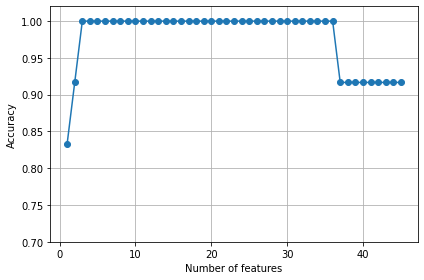

In [0]:
knn = KNeighborsClassifier(n_neighbors=3)

# selecting features
sbs = SBS(knn, k_features=1)
sbs.fit(X_train_eqfr, y_train)

# plotting performance of feature subsets
k_feat = [len(k) for k in sbs.subsets_]

plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([0.7, 1.02])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.tight_layout()
plt.show()

### 4.4 Model evaluation

In [0]:
k3 = list(sbs.subsets_[43])
print(df.columns[3:][k3])

Index(['D49950', 'M21551_rna1'], dtype='object')


In [0]:
knn.fit(X_train_eqfr[:, k3], y_train)
print('Training accuracy:', knn.score(X_train_eqfr[:, k3], y_train))
print('Test accuracy:', knn.score(X_test_eqfr[:, k3], y_test))

Training accuracy: 0.9347826086956522
Test accuracy: 0.8571428571428571


In [0]:
knn.fit(X_train_eqwd[:, k3], y_train)
print('Training accuracy:', knn.score(X_train_eqwd[:, k3], y_train))
print('Test accuracy:', knn.score(X_test_eqwd[:, k3], y_test))

Training accuracy: 0.9130434782608695
Test accuracy: 0.8571428571428571


Determine the training and test accuracies for 
1. all features
2. the best $N$ selected features.

In [0]:
knn.fit(X_train, y_train)
print('Training accuracy:', knn.score(X_train, y_train))
print('Test accuracy:', knn.score(X_test, y_test))

Training accuracy: 0.9782608695652174
Test accuracy: 1.0


In [0]:
knn.fit(X_train_eqwd[:, k3], y_train)
print('Training accuracy:', knn.score(X_train_eqwd[:, k3], y_train))
print('Test accuracy:', knn.score(X_test_eqwd[:, k3], y_test))

Training accuracy: 0.9130434782608695
Test accuracy: 0.8571428571428571


***
## <img src="https://img.icons8.com/color/32/000000/new-document.png"/> Section 4 - Report

Answer the following questions below:
1. Which discretization approach did you choose? equal-width or equal-frequency? Why?
1. How many features did you select?  Why did you determine that particular value for $N$?
1. `[Plot]` Make a pair-plot of your $N$ selected features.
1. `[Table]` In markup, make a $3\times3$ table that compares your training/testing accuracy for each experiment. 
  1. all features
  2. best $N$ features
  * Explain your results


### <img src="https://img.icons8.com/color/32/000000/speech-bubble-with-dots.png"/> **Student Response**


**Which discretization approach did you choose? equal-width or equal-frequency? Why?**.   
equal-frequency as it seemed to have a between distribution

**How many features did you select? Why did you determine that particular value for  𝑁 ?**.  
3, was the first number with good accuracy and I figured it would reduce cost over using more features

**[Plot] Make a pair-plot of your  𝑁  selected features.**.   


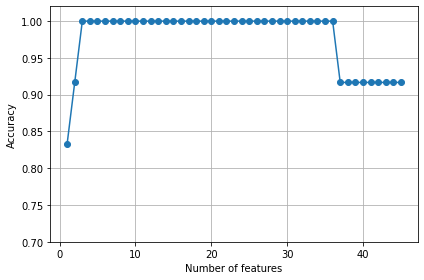

In [0]:
knn = KNeighborsClassifier(n_neighbors=3)

# selecting features
sbs = SBS(knn, k_features=1)
sbs.fit(X_train_eqfr, y_train)

# plotting performance of feature subsets
k_feat = [len(k) for k in sbs.subsets_]

plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([0.7, 1.02])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.tight_layout()
plt.show()

**[Table] In markup, make a  3×3  table that compares your training/testing**    
**accuracy for each experiment.**   
**all features**.   
**best  𝑁  features**.   

    

**Explain your results**.   

| | All | best 3 |
| --- | --- | --- |
| training accuracy | 0.9782608695652174 | 0.9130434782608695 |
| test accuracy | 1.0 | 0.8571428571428571 |

***